# Top Spotify Tracks - Clustering model

In [3]:
#import libraries
import pandas as pd
import numpy as np

# visualisation 
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.cluster import KMeans

#evaluation
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#EDA

In [6]:
#loading training and testing datasets
df_pd =  pd.read_csv("top2018.csv")
df_pd_copy = df_pd.copy()
df_pd.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [0]:
#Can drop Id column, name and artist.. these will not help with clustering...
df_pd = df_pd.drop(["id", "name", "artists"], axis=1) 

In [0]:
#Checking data types
df_pd.info()
#Cat variables = id, song name and artist name, rest are num variables...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   energy            100 non-null    float64
 2   key               100 non-null    float64
 3   loudness          100 non-null    float64
 4   mode              100 non-null    float64
 5   speechiness       100 non-null    float64
 6   acousticness      100 non-null    float64
 7   instrumentalness  100 non-null    float64
 8   liveness          100 non-null    float64
 9   valence           100 non-null    float64
 10  tempo             100 non-null    float64
 11  duration_ms       100 non-null    float64
 12  time_signature    100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB


In [0]:
#checking for missing values....
df_pd.isnull().sum()
#No missing values...

Out[6]: danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [0]:
df_pd.describe()
#Looks like 75% of songs have a time_signature of 4, and not much of a variance, either 3,4, or 5. so could probably drop this feature also...

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [0]:
df_pd = df_pd.drop({"time_signature"}, axis = 1)

In [0]:
def col_summary(df, col_name):
    print(pd.DataFrame({col_name: df[col_name].value_counts()}))

for col in df_pd:
    col_summary(df_pd, col)

#all remaining cols are numerical...
#mode may be categorical...only 2 values

       danceability
0.791             3
0.754             2
0.698             2
0.752             2
0.909             2
...             ...
0.737             1
0.884             1
0.599             1
0.872             1
0.553             1

[92 rows x 1 columns]
       energy
0.559       2
0.713       2
0.658       2
0.449       1
0.761       1
...       ...
0.538       1
0.636       1
0.448       1
0.391       1
0.586       1

[97 rows x 1 columns]
      key
1.0    15
8.0    11
5.0    10
9.0    10
0.0    10
11.0   10
2.0     7
6.0     7
7.0     6
10.0    5
4.0     5
3.0     4
        loudness
-4.333         2
-9.211         1
-7.321         1
-5.456         1
-4.979         1
...          ...
-4.546         1
-7.442         1
-6.312         1
-9.144         1
-6.319         1

[99 rows x 1 columns]
     mode
1.0    59
0.0    41
        speechiness
0.1170            2
0.0333            2
0.0504            2
0.0449            2
0.1090            1
...             ...
0.1960            1

Out[10]: Text(0.5, 1.0, 'mode')

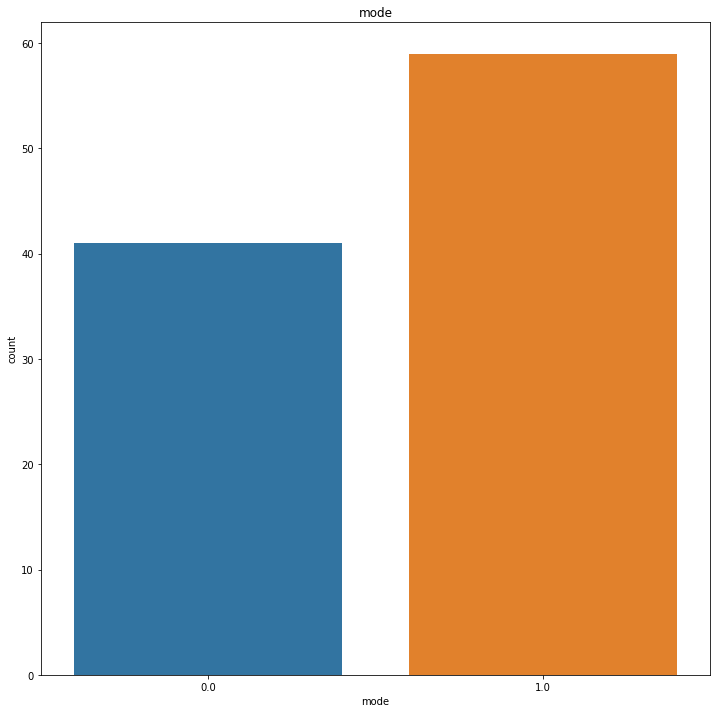

In [0]:
plt.figure(figsize=(12,12))
sns.countplot(x = "mode", data = df_pd)
plt.title("mode")

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

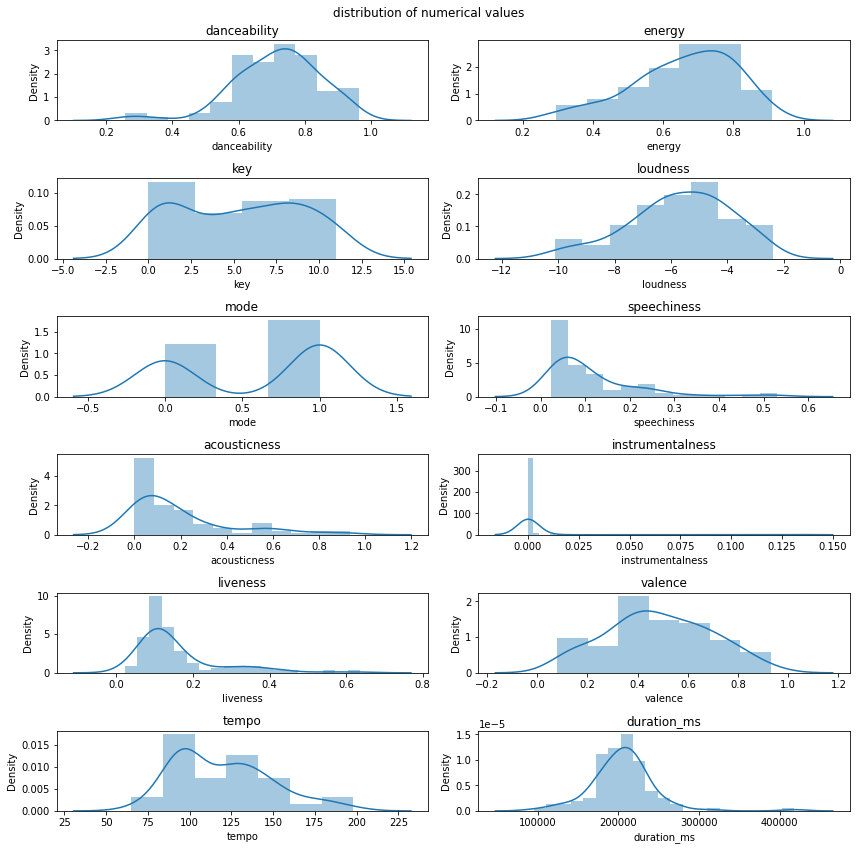

In [0]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
plt.tight_layout()
for i in df_pd:
    plt.subplot(6,2,k)
    sns.distplot(df_pd[i])
    plt.title(i)
    plt.tight_layout()
    k+=1
#Looks like distribution for alot of these variables are skewed...
#df_pd.hist(figsize=(12,12)); - alternative hist plot..

In [0]:
for i in df_pd:
    Q1 = df_pd[i].quantile(0.25)
    Q3 = df_pd[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_pd[(df_pd[i] > up) | (df_pd[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

danceability yes
energy no
key no
loudness yes
mode no
speechiness yes
acousticness yes
instrumentalness yes
liveness yes
valence no
tempo no
duration_ms yes


In [0]:
outlier_cols = ["danceability", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "duration_ms"]

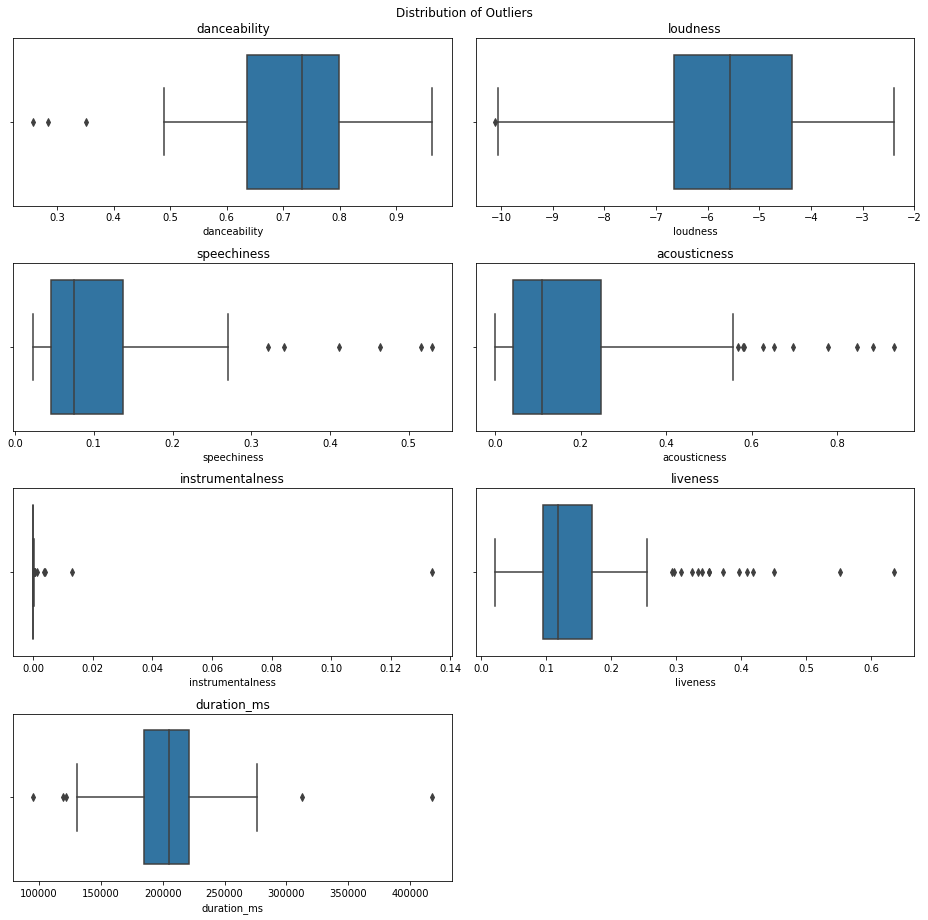

In [0]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df_pd.loc[:,outlier_cols]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df_pd.loc[:,outlier_cols])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [0]:
# removing outliers;

for i in df_pd.loc[:,outlier_cols]:
    Q1 = df_pd[i].quantile(0.25)
    Q3 = df_pd[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df_pd.loc[df_pd[i] > up_lim,i] = up_lim
    df_pd.loc[df_pd[i] < low_lim,i] = low_lim

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

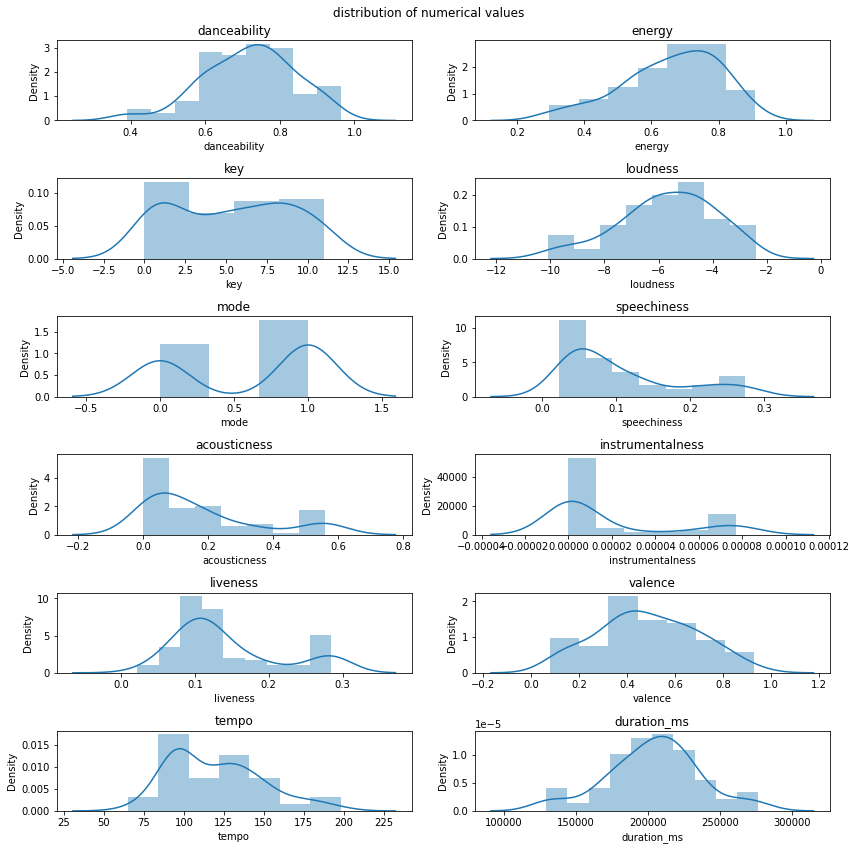

In [0]:
# reviewing distribution
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
plt.tight_layout()
for i in df_pd:
    plt.subplot(6,2,k)
    sns.distplot(df_pd[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

#Looks like a much better distribution...

# Data transformation

In [0]:
df_pd

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.754000,0.449,7.0,-9.211,1.0,0.109000,0.033200,0.000077,0.284863,0.3570,77.169,198973.0
1,0.740000,0.613,8.0,-4.880,1.0,0.145000,0.258000,0.000077,0.123000,0.4730,75.023,166606.0
2,0.587000,0.535,5.0,-6.090,0.0,0.089800,0.117000,0.000066,0.131000,0.1400,159.847,218147.0
3,0.739000,0.559,8.0,-8.011,1.0,0.117000,0.559037,0.000000,0.112000,0.4390,140.124,221440.0
4,0.835000,0.626,1.0,-5.833,1.0,0.125000,0.058900,0.000060,0.284863,0.3500,91.030,217925.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.684000,0.619,10.0,-7.005,1.0,0.038600,0.071600,0.000000,0.122000,0.2840,125.046,217440.0
96,0.638000,0.658,3.0,-6.318,1.0,0.045600,0.245000,0.000004,0.091900,0.3300,105.076,205748.0
97,0.552000,0.760,0.0,-4.706,1.0,0.274475,0.073300,0.000000,0.086500,0.6390,135.702,260000.0
98,0.391375,0.437,11.0,-6.593,0.0,0.039000,0.101000,0.000001,0.106000,0.0967,180.043,239000.0


In [0]:
#standardisation
scaler = StandardScaler()
X = scaler.fit_transform(df_pd)
#NOTE: Standardisation seems to be ruducing the silhouette score and plots unclear elbow curve. So have used unstandardised data in kmeans. 

# Optimum number of clusters..

## Looking at WCSS score...
low wcss and low number of clusters ideal...

In [0]:
#Note using non standardised data here as standardisation not giving recommended K n.o and is reducing silhouette score
score=[]
K=range(1,11)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=1)
    kmeans.fit(df_pd)
    score.append(kmeans.inertia_)

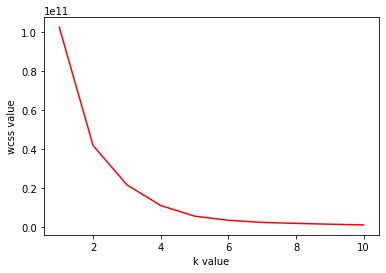

In [0]:
plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()
#K=4 ideal number of clusters

## Silhouette score...

In [0]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(df_pd)
    score = silhouette_score(df_pd, kmeans.labels_, metric='euclidean')
    print(k, score)

print("Mean silhouette score: ")
silhouette_score(df_pd, kmeans.labels_, metric='euclidean')

2 0.5384878304530699
3 0.5251321302230728
4 0.5648323626380821
5 0.5816328794986035
6 0.6048960086741776
7 0.6087763617849212
8 0.6091920888385313
9 0.5818625808160971
10 0.5872771991739602
Mean silhouette score: 
Out[22]: 0.5872771991739602

The Silhouette score measures how close each example in the cluster is to the points in the neighboring cluster. The closer it is to +1 the better the clusters are, and so we have a pretty low score indicating our examples belong to not distinct groups & almost overlapping?.. This is when doing standardisation before..
Opposite is true if data not standardised...

# Modelling K-means

In [0]:
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans.fit(df_pd)

Out[62]: KMeans(n_clusters=4, random_state=7)

In [0]:
cluster = kmeans.labels_
cluster

Out[63]: array([2, 0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       0, 2, 1, 1, 2, 0, 0, 3, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 3, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 2, 3, 1, 2], dtype=int32)

In [0]:
df_pd2["cluster_no"]=cluster
df_pd2

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_no
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0,2
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0,0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0,1
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0,1
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0,2
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0,3
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0,1


In [0]:
df_pd2.cluster_no.value_counts()

Out[65]: 2    40
1    40
0    12
3     8
Name: cluster_no, dtype: int64

#PCA - dimentionality reduction

PCA finds the optimal number of components which capture the greatest amount of variance in the data.
This technique transform the original high-dimensional feature space into a lower-dimensional space while preserving the most important information in the data.

In [0]:
pca = PCA(n_components=2).fit(df_pd)
X_pca = pca.transform(df_pd)
X.shape, X_pca.shape

Out[28]: ((100, 12), (100, 2))

In [0]:
score_pca=[]
K=range(1,11)

for i in K:
    kmeans_pca=KMeans(n_clusters=i,init="k-means++",random_state=1)
    kmeans_pca.fit(X_pca)
    score_pca.append(kmeans_pca.inertia_)

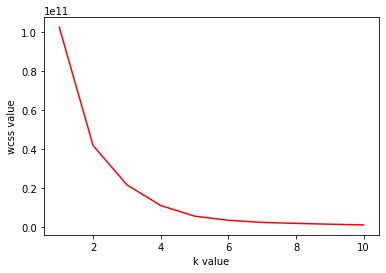

In [0]:
plt.plot(K,score_pca,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [0]:
silhouette_scores_pca = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
    print(k, score)

print("Mean silhouette score: ")
silhouette_score(X_pca, kmeans.labels_, metric='euclidean')

2 0.5384879585528011
3 0.5251323350906708
4 0.5648327607810929
5 0.5816336535881139
6 0.6048970084234773
7 0.6087776489168931
8 0.6091934734040039
9 0.5818646000998757
10 0.5872793037627982
Mean silhouette score: 
Out[47]: 0.5872793037627982

In [0]:
#from above doesnt look like dimentionality reduction is doing much...very similar silhouette score and intertias
#Would still use k=3 in kmeans from above...

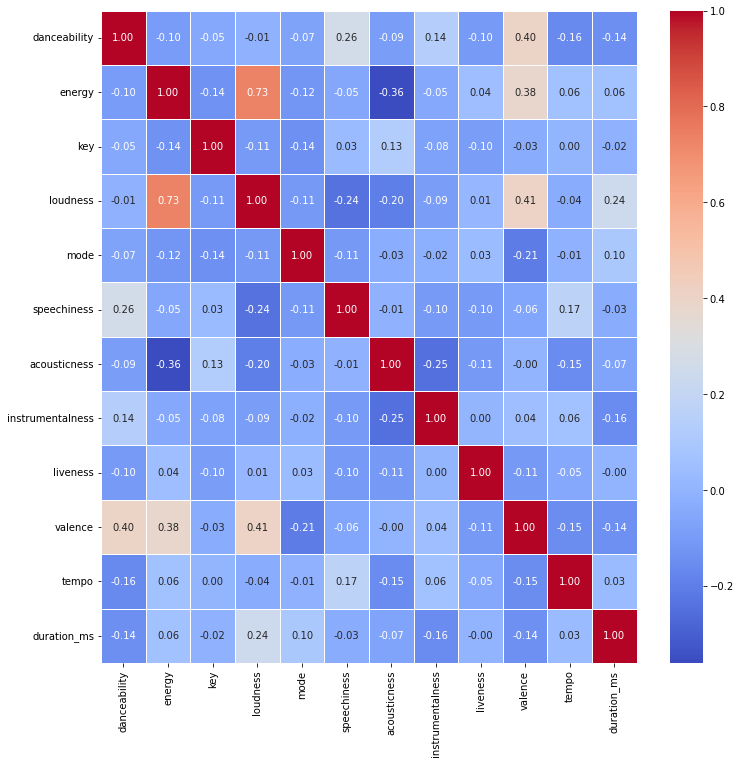

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(df_pd.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()
#Can see here that there isnt high correlation between any 2 variables. suggests PCA not needed.

# Investigating clusters

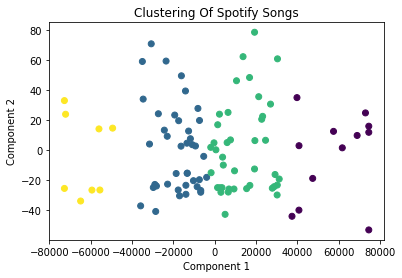

In [0]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster)
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [0]:
#looking at cluster characteristics
cluster0 = df_pd2[df_pd2['cluster_no'] == 0]
cluster1 = df_pd2[df_pd2['cluster_no'] == 1]
cluster2 = df_pd2[df_pd2['cluster_no'] == 2]
cluster3 = df_pd2[df_pd2['cluster_no'] == 3]

clusters = [cluster0, cluster1, cluster2, cluster3]

for i in clusters:
    print(i[["name", "artists", "cluster_no"]])

#From general knowledge of artists, looks like cluster 0 is rap artists, cluster 1 is radio, cluster 2 is more pop

                                        name            artists  cluster_no
1                                       SAD!       XXXTENTACION           0
18                                 Moonlight       XXXTENTACION           0
22                                      Mine              Bazzi           0
27  Meant to Be (feat. Florida Georgia Line)         Bebe Rexha           0
28                            Jocelyn Flores       XXXTENTACION           0
33                                 Nevermind       Dennis Lloyd           0
38                                   changes       XXXTENTACION           0
57                       Body (feat. brando)        Loud Luxury           0
62            Fuck Love (feat. Trippie Redd)       XXXTENTACION           0
71                             Feel It Still  Portugal. The Man           0
91                                Yes Indeed           Lil Baby           0
94        Everybody Dies In Their Nightmares       XXXTENTACION           0
            

# Conclusion
- Can see clusters are well defined.
- This dataset was small, only containing 100 rows
- If i call the spotify api to get more training data, the clusters could be defined with more confidence.